1층
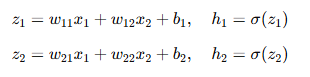

2층
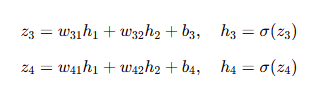

출력
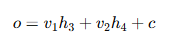

Loss (MSE)
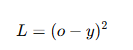

인 간단한 신경망이 있다고 생각해보자.

그리고 1층에서 2층으로는 fully-connected 되어 있다. (1층의 모든 출력이, 2층의 모든 입력으로 연결되어 있다는 뜻)


이 상황에서 dL / dW11 (1층의 1번 신경) 은

```
x1 ----\
        > w11 -> z1 -> h1 -> (h3 -> o -> L)
x2 ----/                      \
                            -> (h4 -> o -> L)
```

이렇게 흘러간다.

즉 w11 은 두개의 영향을 모두 받고, 경로 두개를 모두 고려해야 한다.


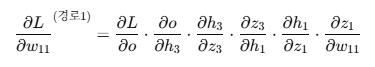

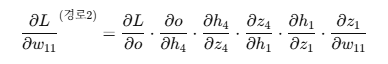


이렇게 두 경로를 합쳐서


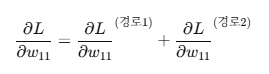


이 과정을 통해 계산해야 한다.


이게 근데 w11 하나의 미분이고

w11, w12, w21, w22, w31, w32, w41, w42, b11, b12, b21, b22, b31, b32, b41, b42 와 출력층의 c가 있다.

2*2 -> output 의 간단한 네트워크도 이미 이런 지옥같은 미분을 해야 하는데...


이미 답이 안나온다.


그래서 우리는 좀 더 고민해본 결과, 뒤에서부터 전파하면, 이미 사용된 값을 재 사용할 수 있다는 사실을 알게 되었다.



자 다시 식을 뜯어보자.

Loss 를 미분하면

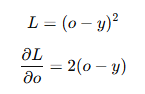

이 식이 나온다.

여기서

출력값을 미분하면


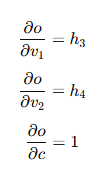
이 값이 나오고

이 값을 h3, h4와 v1 v2 의 편미분 식으로 정리할 수 있다.

각각은 독립이기 때문에 편미분하면 자신 빼고 다 사라진다.

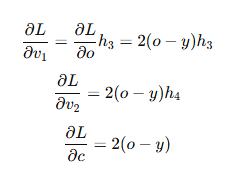



다시

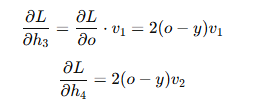

이 값을 가지고

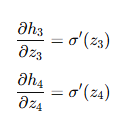

활성화 함수의 편미분값을 같이 계산하면
 - 활성화 함수 자체는 다음 장에 설명합니다.

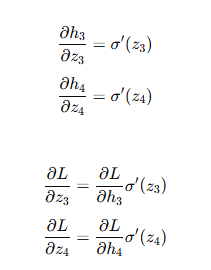

2층의 loss 를 가볍게(?) 계산 할 수 있다.


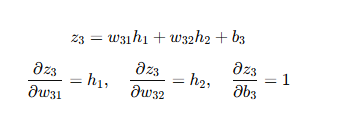

2층의 layer 도 역시 동일한 방식으로 계산 가능하다

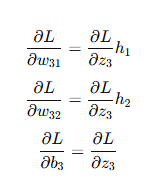
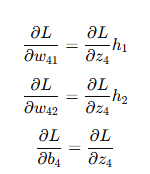

앞에서 사용되었던 값이 다시 재사용 되면서, 계산량을 획기적으로 줄여둔다 (그 값이 뭔지만 기억하고 있으면 바로 계산 가능!)



위와 같은 방식으로 1층도 계산 할 수 있다.

2->1 은 o -> 2 와 동일하니 생략.



그래서 back-propagation 을 하면, 계산량을 획기적으로 줄이면서 신경망을 업데이트 할 수 있어서 

추론 -> loss 계산 -> 역전파 -> 추론 -> loss 계산 -> 역전파

이 과정을 반복하면서 모델을 학습하게 된다.



실제로 이거 둘 다 컴공 4학년때 구현해보는데 굳이 그럴필요는 없고

pytorch 같은 머신러닝 라이브러리를 쓰면, back propagation 은 자동으로 해 주기 때문에 이렇게 구현 되어있구나 만 알면 된다.

(수식 안 외워도 되고, 일반적인 방식보다 훨씬 빠르게 계산이 가능하다는 사실만 알면 됨.)

결국 이것도 Dynamic Programming 의 일종이다.